### Initialize Spark Session 

In [121]:
# initialize spark session
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('iteration4').getOrCreate()

### Data Import and Exploration

In [122]:
# import without schema
dfs = spark.read.csv('cardio_train.csv', header=True)

In [123]:
dfs.show()

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|    62|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|    85|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|    64|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|    82|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|    56|  100|   60|          1|   1|    0|   0|     0|     0|
|  8|21914|     1|   151|    67|  120|   80|          2|   2|    0|   0|     0|     0|
|  9|22113|     1|   157|    93|  130|   80|          3|   1|    0|   0|     1|     0|
| 12|22584|     2|   178|    95|  130|   90|          3|   3|    0|   0|     1|     1|
| 13|17668|     1|   158|    71|  110|   70

In [124]:
dfs.columns

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [125]:
display(dfs)

DataFrame[id: string, age: string, gender: string, height: string, weight: string, ap_hi: string, ap_lo: string, cholesterol: string, gluc: string, smoke: string, alco: string, active: string, cardio: string]

In [157]:
dfs.describe().show()

+-------+------------------+------------------+-------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+--------------------+------------------+------------------+
|summary|                id|               age|             gender|            height|            weight|            ap_hi|             ap_lo|       cholesterol|              gluc|              smoke|                alco|            active|            cardio|
+-------+------------------+------------------+-------------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+--------------------+------------------+------------------+
|  count|             70000|             70000|              70000|             70000|             70000|            70000|             70000|             70000|             70000|              70000|               70000

In [158]:
# import with inferred schema automatically, only for csv
dfs = spark.read.csv('cardio_train.csv', header=True, inferSchema=True)

In [128]:
dfs.show(5) 
dfs.head()
# check features and data type
dfs.printSchema() #df.columns & df.dtypes
# check number of records
print('Number of Rows: ', dfs.count())

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
only showing top 5 rows

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)


In [129]:
# Import the relevant Python libraries.
import numpy as np
import pandas as pd 
df = dfs.toPandas()

print(df['weight'])
print(df['cardio'])

0         62.0
1         85.0
2         64.0
3         82.0
4         56.0
         ...  
69995     76.0
69996    126.0
69997    105.0
69998     72.0
69999     72.0
Name: weight, Length: 70000, dtype: float64
0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64


In [130]:
from matplotlib import rcParams
import seaborn as sns

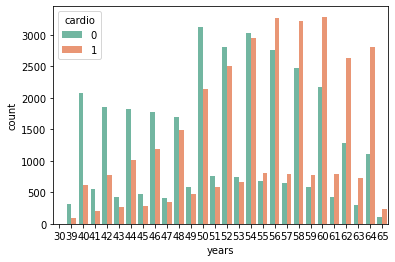

In [131]:
#rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2"); 

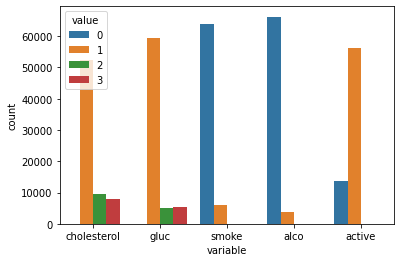

In [132]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

In [133]:
# data audit
dfs.describe('weight', 'height','ap_lo', 'ap_hi', 'age', 'cardio').show()

+-------+------------------+------------------+------------------+-----------------+------------------+------------------+
|summary|            weight|            height|             ap_lo|            ap_hi|               age|            cardio|
+-------+------------------+------------------+------------------+-----------------+------------------+------------------+
|  count|             70000|             70000|             70000|            70000|             70000|             70000|
|   mean|          74.20569|164.35922857142856| 96.63041428571428|128.8172857142857|19468.865814285713|            0.4997|
| stddev|14.395756678511347| 8.210126364538075|188.47253029638918|154.0114194560919| 2467.251667241397|0.5000034814661851|
|    min|              10.0|                55|               -70|             -150|             10798|                 0|
|    max|             200.0|               250|             11000|            16020|             23713|                 1|
+-------+-------

In [134]:
dfs.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: double (nullable = true)
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)
 |-- cholesterol: integer (nullable = true)
 |-- gluc: integer (nullable = true)
 |-- smoke: integer (nullable = true)
 |-- alco: integer (nullable = true)
 |-- active: integer (nullable = true)
 |-- cardio: integer (nullable = true)



In [135]:
from pyspark.sql.functions import isnan, when, count, col
dfs.select([count(when(isnan(c), c)).alias(c) for c in dfs.columns]).show()

+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|  0|     0|     0|     0|    0|    0|          0|   0|    0|   0|     0|     0|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+



### Data Preparation

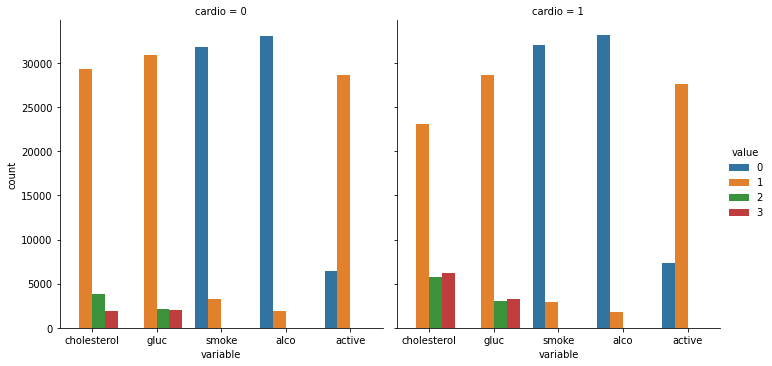

In [136]:
# Data Select
from matplotlib import rcParams
#rcParams['figure.figsize'] = 11, 8
#data['years'] = (df['age'] / 365).round().astype('int')
#sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

#df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
#sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

In [137]:
# We can also group, and show the averages of each group.
dfs.groupBy('gender').mean('height').show()

+------+------------------+
|gender|       avg(height)|
+------+------------------+
|     1|161.35561168460356|
|     2|169.94789538210054|
+------+------------------+



In [138]:
dfs.groupBy('gender').sum('alco').show()

+------+---------+
|gender|sum(alco)|
+------+---------+
|     1|     1161|
|     2|     2603|
+------+---------+



In [139]:
dfs.groupBy('gender').count().show()

+------+-----+
|gender|count|
+------+-----+
|     1|45530|
|     2|24470|
+------+-----+



In [140]:
dfs.groupBy('cardio').count().show()

+------+-----+
|cardio|count|
+------+-----+
|     1|34979|
|     0|35021|
+------+-----+



In [141]:
dfs.groupBy('gender').sum('cardio').show()

+------+-----------+
|gender|sum(cardio)|
+------+-----------+
|     1|      22616|
|     2|      12363|
+------+-----------+



In [142]:
dfs.stat.crosstab("cardio", "gender").show()

+-------------+-----+-----+
|cardio_gender|    1|    2|
+-------------+-----+-----+
|            1|22616|12363|
|            0|22914|12107|
+-------------+-----+-----+



In [143]:
freq = dfs.stat.freqItems(["cardio", "gender", "ap_hi"], 0.4)
freq.collect()[0]

Row(cardio_freqItems=[1, 0], gender_freqItems=[2, 1], ap_hi_freqItems=[120, 135])

In [144]:
dfs.select([count(when(isnan(c), c)).alias(c) for c in dfs.columns]).show()

+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|  0|     0|     0|     0|    0|    0|          0|   0|    0|   0|     0|     0|
+---+---+------+------+------+-----+-----+-----------+----+-----+----+------+------+



In [145]:
from pyspark.sql.functions import isnan, when, count, col

dfs.select([count(when(col('cardio').isNull(),True))]).show()

+-----------------------------------------------+
|count(CASE WHEN (cardio IS NULL) THEN true END)|
+-----------------------------------------------+
|                                              0|
+-----------------------------------------------+



In [146]:
dfs.select([count(when(col('age').isNull(),True))]).show()

+--------------------------------------------+
|count(CASE WHEN (age IS NULL) THEN true END)|
+--------------------------------------------+
|                                           0|
+--------------------------------------------+



In [147]:
dfs.select([count(when(col('gender').isNull(),True))]).show()

+-----------------------------------------------+
|count(CASE WHEN (gender IS NULL) THEN true END)|
+-----------------------------------------------+
|                                              0|
+-----------------------------------------------+



In [148]:
dfs.select([count(when(col('height').isNull(),True))]).show()

+-----------------------------------------------+
|count(CASE WHEN (height IS NULL) THEN true END)|
+-----------------------------------------------+
|                                              0|
+-----------------------------------------------+



In [149]:
dfs.select([count(when(col('weight').isNull(),True))]).show()

+-----------------------------------------------+
|count(CASE WHEN (weight IS NULL) THEN true END)|
+-----------------------------------------------+
|                                              0|
+-----------------------------------------------+



In [150]:
dfs.select([count(when(col('ap_hi').isNull(),True))]).show()

+----------------------------------------------+
|count(CASE WHEN (ap_hi IS NULL) THEN true END)|
+----------------------------------------------+
|                                             0|
+----------------------------------------------+



In [151]:
dfs.select([count(when(col('ap_lo').isNull(),True))]).show()

+----------------------------------------------+
|count(CASE WHEN (ap_lo IS NULL) THEN true END)|
+----------------------------------------------+
|                                             0|
+----------------------------------------------+



In [152]:
# Using this syntax, we can drop any row with missing data. Three rows are dropped.
dfs.na.drop().show()

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
|  8|21914|     1|   151|  67.0|  120|   80|          2|   2|    0|   0|     0|     0|
|  9|22113|     1|   157|  93.0|  130|   80|          3|   1|    0|   0|     1|     0|
| 12|22584|     2|   178|  95.0|  130|   90|          3|   3|    0|   0|     1|     1|
| 13|17668|     1|   158|  71.0|  110|   70

In [153]:
dfs.columns

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [154]:
dfs.show(10)

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
|  8|21914|     1|   151|  67.0|  120|   80|          2|   2|    0|   0|     0|     0|
|  9|22113|     1|   157|  93.0|  130|   80|          3|   1|    0|   0|     1|     0|
| 12|22584|     2|   178|  95.0|  130|   90|          3|   3|    0|   0|     1|     1|
| 13|17668|     1|   158|  71.0|  110|   70

In [160]:
dfs.describe('age', 'gender','height', 'weight', 'ap_hi', 'ap_lo').show()

+-------+------------------+-------------------+------------------+------------------+-----------------+------------------+
|summary|               age|             gender|            height|            weight|            ap_hi|             ap_lo|
+-------+------------------+-------------------+------------------+------------------+-----------------+------------------+
|  count|             70000|              70000|             70000|             70000|            70000|             70000|
|   mean|19468.865814285713| 1.3495714285714286|164.35922857142856|          74.20569|128.8172857142857| 96.63041428571428|
| stddev| 2467.251667241397|0.47683801558286265| 8.210126364538075|14.395756678511347|154.0114194560919|188.47253029638918|
|    min|             10798|                  1|                55|              10.0|             -150|               -70|
|    max|             23713|                  2|               250|             200.0|            16020|             11000|
+-------

In [161]:
from pyspark.sql.functions import isnan, when, count, col
dfs.filter( (dfs['ap_hi'] <360) & (dfs['ap_lo'] < 360) ).show()

+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
| id|  age|gender|height|weight|ap_hi|ap_lo|cholesterol|gluc|smoke|alco|active|cardio|
+---+-----+------+------+------+-----+-----+-----------+----+-----+----+------+------+
|  0|18393|     2|   168|  62.0|  110|   80|          1|   1|    0|   0|     1|     0|
|  1|20228|     1|   156|  85.0|  140|   90|          3|   1|    0|   0|     1|     1|
|  2|18857|     1|   165|  64.0|  130|   70|          3|   1|    0|   0|     0|     1|
|  3|17623|     2|   169|  82.0|  150|  100|          1|   1|    0|   0|     1|     1|
|  4|17474|     1|   156|  56.0|  100|   60|          1|   1|    0|   0|     0|     0|
|  8|21914|     1|   151|  67.0|  120|   80|          2|   2|    0|   0|     0|     0|
|  9|22113|     1|   157|  93.0|  130|   80|          3|   1|    0|   0|     1|     0|
| 12|22584|     2|   178|  95.0|  130|   90|          3|   3|    0|   0|     1|     1|
| 13|17668|     1|   158|  71.0|  110|   70

In [162]:
import pyspark
from pyspark.sql import SparkSession 
import pyspark.sql.functions as func

In [163]:
#df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
#df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

dfs_outlier = dfs

drop_list = ['ap_hi', 'ap_lo']

dfs_outlier = dfs_outlier.select([column for column in df.columns if column in drop_list])

dfs_outlier.printSchema()

bounds = {
    c: dict(
        zip(["q1", "q3"], df_outlier.approxQuantile(c, [0.025, 0.975], 0))
    )
    for c in df_outlier.columns
}

for c in bounds:
    iqr = bounds[c]['q3'] - bounds[c]['q1']
    bounds[c]['lower'] = bounds[c]['q1']# - (iqr * 1.5)
    bounds[c]['upper'] = bounds[c]['q3']# + (iqr * 1.5)
    

for i in dfs_outlier.schema.names:
    print(i + ": " + str(bounds[i]))
    print("")

root
 |-- ap_hi: integer (nullable = true)
 |-- ap_lo: integer (nullable = true)

ap_hi: {'q1': 100.0, 'q3': 170.0, 'lower': 100.0, 'upper': 170.0}

ap_lo: {'q1': 60.0, 'q3': 100.0, 'lower': 60.0, 'upper': 100.0}



In [164]:
dfs = dfs.filter( (dfs['ap_hi'] > dfs['ap_lo']) )


In [165]:
print('Number of Rows: ', dfs.count())

print(dfs)


Number of Rows:  68764
DataFrame[id: int, age: int, gender: int, height: int, weight: double, ap_hi: int, ap_lo: int, cholesterol: int, gluc: int, smoke: int, alco: int, active: int, cardio: int]


In [166]:
dfs.drop_duplicates().count()

68764

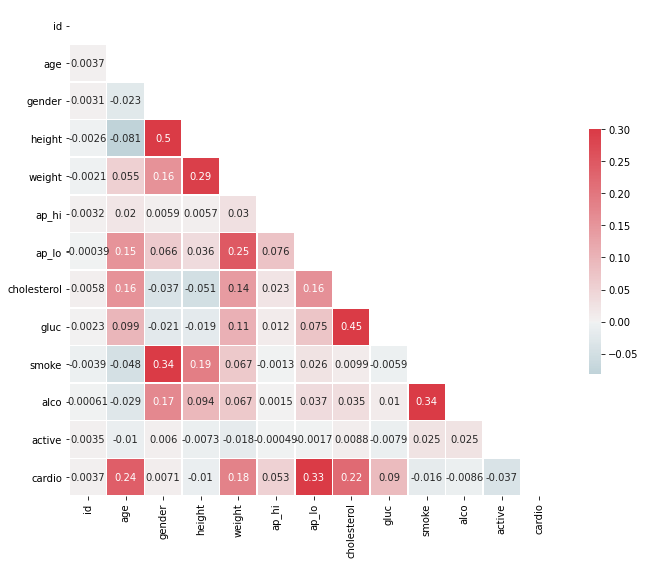

In [167]:
from matplotlib import pyplot as plt

df = dfs.toPandas()

corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [171]:
df = dfs
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
#sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
#print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

In [ ]:
df.withColumn('years',func.round(df['age']/365, 2)).show()

In [ ]:
#select * from data where rating > 3
df.filter('rating > 3').show()
#select * from data where userid = 2 and rating > 3
df.filter('userid == 2 and rating > 3').show()
#select userid, rating from data where userid = 2 and rating > 3
df.filter('userid == 2 and rating > 3').select('userid', 'rating').show()
df.select("userID", "rating").filter("userID = 2 and rating > 3").show()

In [ ]:
# Data Clean
# drop feature 'instant'
df_cleaned = df_selected.drop('cardio')
# remove rows where '' is null
#df_cleaned = df_cleaned.na.drop(subset='')

In [ ]:
df_cleaned.show(2)
df_cleaned.describe('cnt').show()
df_cleaned.count()

In [ ]:
# fill null values with mean of values in 'temp', 'atemp', 'hum'
from pyspark.sql.functions import mean
mean_temp = df.select(mean(df.temp)).collect()[0][0]
mean_atemp = df.select(mean(df.atemp)).collect()[0][0]
mean_hum = df.select(mean(df.hum)).collect()[0][0]
mean = {'temp': mean_temp, 'atemp': mean_atemp, 'hum': mean_hum}
df_cleaned = df_cleaned.na.fill(mean)

In [ ]:
df_cleaned.describe('temp', 'atemp', 'hum', 'cnt').show(1)
df_cleaned.printSchema()

In [ ]:
# Construct Data
from pyspark.ml.feature import OneHotEncoder
# one hot encode: convert numbers into a vector
mnthEncoder = OneHotEncoder(inputCol='mnth', outputCol='mnthVec')
hrEncoder = OneHotEncoder(inputCol='hr', outputCol='hrVec')
weatherEncoder = OneHotEncoder(inputCol='weathersit', outputCol='weatherVec')
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = [hrEncoder, mnthEncoder, weatherEncoder])
df_constructed = pipeline.fit(df_cleaned).transform(df_cleaned)

In [ ]:
df_constructed.printSchema()

### Data Transform

In [ ]:
# Reduce the data
df_reduced = df_constructed.drop('mnth', 'hr', 'weathersit')

In [ ]:
df_reduced.printSchema()

In [ ]:
# Project the data
# assemble features into a vector for modeling
from pyspark.ml.feature import VectorAssembler
featuresCol = df_reduced.drop('cnt').columns
assembler = VectorAssembler(inputCols = featuresCol, outputCol = 'features')
df_projected = assembler.transform(df_reduced)

In [ ]:
final_data = df_projected.select('cnt', 'features')
final_data.show(5)

### Model Select

In [ ]:
from pyspark.ml.regression import (RandomForestRegressor, 
                                   GBTRegressor, 
                                   DecisionTreeRegressor)
# create evaluator with R2
from pyspark.ml.evaluation import RegressionEvaluator
evaluator = RegressionEvaluator(labelCol='cnt', predictionCol='prediction',
                                metricName='r2')
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#create a sample for model test
sample, x = final_data.randomSplit([0.1, 0.9])

In [ ]:
# fit models with different parameters and evaluate
# random forest regression model with maxDepth: 3, 6, 9,..., 30
r2_rfr = np.zeros(10)
for i in np.arange(10):
    rfr = RandomForestRegressor(labelCol='cnt', maxDepth=(i+1)*3)
    rfrModel = rfr.fit(sample)
    prediction_rfr = rfrModel.transform(sample)
    r2_rfr[i] = evaluator.evaluate(prediction_rfr)
plt.plot(np.arange(3, 33, 3), r2_rfr)
r2_rfr

In [ ]:
# Gradient Boosted Trees model with maxIter: 10, 20, 30,..., 100
r2_gbt = np.zeros(10)
for i in np.arange(10):
    gbt = GBTRegressor(labelCol='cnt', maxIter = (i+1)*10)
    gbtModel = gbt.fit(sample)
    prediction_gbt = gbtModel.transform(sample)
    r2_gbt[i] = evaluator.evaluate(prediction_gbt)
plt.plot(np.arange(10, 105, 10), r2_gbt)
r2_gbt

In [ ]:
# Decision Tree Regression model with maxDepth: 3, 6, 9,..., 30
r2_dtr = np.zeros(10)
for i in np.arange(10):
    dtr = DecisionTreeRegressor(labelCol='cnt', maxDepth= (i+1)*3)
    dtrModel = dtr.fit(sample)
    prediction_dtr = dtrModel.transform(sample)
    r2_dtr[i] = evaluator.evaluate(prediction_dtr)
plt.plot(np.arange(3, 33, 3), r2_dtr)
r2_dtr

### Data Mining

In [ ]:
# split data into train and test
train, test = final_data.randomSplit([0.7, 0.3])

In [ ]:
#create model
GBT = GBTRegressor(labelCol='cnt', maxIter = 80)
# train the model
GBTmodel = GBT.fit(train)
prediction_GBT = GBTmodel.transform(test)

In [ ]:
#show the summary
prediction_GBT.describe().show()

In [ ]:
DTR = DecisionTreeRegressor(labelCol='cnt', maxDepth=20)
DTRmodel = DTR.fit(train)
prediction_DTR = DTRmodel.transform(test)

In [ ]:
# show the summary
prediction_DTR.describe().show()

In [ ]:
RFR = RandomForestRegressor(labelCol='cnt', maxDepth=20)
RFRmodel = RFR.fit(train)
prediction_RFR = RFRmodel.transform(test)

In [ ]:
# show the summary
prediction_RFR.describe().show()

In [ ]:
# search for patterns
print(DTRmodel.toDebugString)

In [ ]:
# search for patterns
print(RFRmodel.toDebugString)

In [ ]:
# search for patterns
print(GBTmodel.toDebugString)

In [ ]:
DTRmodel.featureImportances

In [ ]:
RFRmodel.featureImportances

In [ ]:
GBTmodel.featureImportances

In [ ]:
# before vector assemble
df_reduced.show(5)

In [ ]:
# after vector assemble
df_projected.select('features').collect()[0:5]

### Interpretation

In [ ]:
# study
# Working or Not
axes = plt.subplots(2, 1, figsize = (16,10))
ax1 = plt.subplot(2, 1, 1)
sn.pointplot(data['hr'], data['cnt'], hue=data['workingday'], ax=ax1)
ax1.set_title('the influnce of hour in workingday')
ax2 = plt.subplot(2, 2, 3)
sn.pointplot(data['hr'], data['cnt'], hue=data['holiday'], ax=ax2)
ax2.set_title('the influnce of hour in holiday')
ax3 = plt.subplot(2, 2, 4)
sn.pointplot(data['hr'], data['cnt'], hue=data['weekday'], ax=ax3)
ax3.set_title('the influnce of hour in weekday')

In [ ]:
#virsualize
plt.plot(DTRmodel.featureImportances.values)

In [ ]:
#virsualize
plt.plot(RFRmodel.featureImportances.values)

In [ ]:
#virsualize
plt.plot(GBTmodel.featureImportances.values)

In [ ]:
#virsualize
features = ('year', 'hday', 'wday', 'temp', 'atemp', 'hum', 'wind',
            'hr','hr','hr','hr','hr','hr','hr','hr','hr','hr','hr','hr',
            'hr','hr','hr','hr','hr','hr','hr','hr','hr','hr', 'hr',
            'mnth','mnth', 'mnth', 'mnth', 'mnth', 'mnth', 'mnth','mnth', 
            'mnth','mnth', 'mnth', 'mnth', 'wsit', 'wsit', 'wsit', 'wsit')

In [ ]:
# group the features and visualization:
plt.bar(features ,DTRmodel.featureImportances)

In [ ]:
# group the features and visualization:
plt.bar(features ,RFRmodel.featureImportances)

In [ ]:
# group the features and visualization:
plt.bar(features ,GBTmodel.featureImportances)

In [ ]:
# Interpret
# Registered or Casual
axes = plt.subplots(2, 1, figsize = (16,10))
ax1 = plt.subplot(2, 1, 1)
sn.pointplot(data['hr'], data['registered'], ax=ax1)
ax1.set_title('registered rental counts in a day')
ax2 = plt.subplot(2, 1, 2)
sn.pointplot(data['hr'], data['casual'], ax=ax2)
ax2.set_title('casual rental counts in a day')

In [ ]:
#evaluate model
r2_GBT = evaluator.evaluate(prediction_GBT)
r2_DTR = evaluator.evaluate(prediction_DTR)
r2_RFR = evaluator.evaluate(prediction_RFR)
print('R2 Score of GBT Regression: ', r2_GBT)
print('R2 Score of Decision Tree Regression: ', r2_DTR)
print('R2 Score of Random Forest Regression: ', r2_RFR)